In [13]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

import rtmtools.lblrtm.aerutils as aerutils
import rtmtools.lblrtm.aeranalyse as aeranalyse
import rtmtools.lblrtm.visualisation as viz

import rtmtools.clirad.sw.wrangle as cliradwrangle
import rtmtools.clirad.sw.analyse as cliradanalyse
import rtmtools.clirad.sw.info

import rtmtools.rrtmg.sw.wrangle as rrtmgwrangle
import rtmtools.rrtmg.sw.analyse as rrtmganalyse

import climatools.rrtmg.info as rrtmginfo



importlib.reload(aerutils)
importlib.reload(aeranalyse)
importlib.reload(viz)

importlib.reload(cliradwrangle)
importlib.reload(cliradanalyse)
importlib.reload(rtmtools.clirad.sw.info)

importlib.reload(rrtmgwrangle)
importlib.reload(rrtmganalyse)

importlib.reload(rrtmginfo)


<module 'climatools.rrtmg.info' from '/nuwa_cluster/home/jackyu/climatools/climatools/rrtmg/info.py'>

In [2]:
name_molecule = r'$H_{2}O$'

In [124]:
# Load CRD results

# CRD H2008
pathout_crd = '/nuwa_cluster/home/jackyu/radiation/crd/SW/examples/mls75_H2O/OUTPUT_CRD.dat'
pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_crd, signed_fluxes = True)


In [ ]:
# CRD H2012
pathout_crd = '../crd/SW/examples/mls75_H2O_solzen_60_H2012/OUTPUT_CRD.dat'
pnl_crd_H2012 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_crd, signed_fluxes = True)

In [7]:
# Load CLIRAD results
pathout_clirad = '/nuwa_cluster/home/jackyu/radiation/clirad/SW/examples/mls75_H2O/OUTPUT_CLIRAD.dat'
pnl_clirad = cliradwrangle.OUTPUT_CLIRAD_to_PandasPanel(readfrom = pathout_clirad, signed_fluxes = True)

In [5]:
# Load AER RRTMG's results --- no water continuum
fpath = os.path.join('/nuwa_cluster/home/jackyu/radiation/rrtmg', 
                     'SW/examples/mls_71lvls_H2O/OUTPUT_RRTM')
pnl_rrtmg_nocont = rrtmgwrangle\
                   .OUTPUT_RRTM_to_pandasPanel(readfrom=fpath, 
                                               signed_fluxes=True)

In [6]:
# AER RRTMG's results --- water continuum
fpath = os.path.join('/nuwa_cluster/home/jackyu/radiation/rrtmg',
                     'SW/examples/mls_71lvls_H2O_cont/OUTPUT_RRTM')

pnl_rrtmg_cont = rrtmgwrangle\
                 .OUTPUT_RRTM_to_pandasPanel(readfrom=fpath,
                                             signed_fluxes=True)

# 'Total' heating rates

In [10]:
def plot_total_heating_rates(infos_wavenumber=None, 
                             infos_spectralband=None):
    global molecule_name, xlim_linear
    atm_levels = [70, 30, 0]
    
    if infos_wavenumber:
        (names_wavenumber, 
         colours_wavenumber, 
         linestyles_wavenumber, 
         pnls_wavenumber) = map(list, zip(*infos_wavenumber))
    
        dfs_wavenumber = [aeranalyse\
                          .sum_OUTPUT_RADSUM_over_wbands(pnl,
                                                         V1=1000, 
                                                         V2=25000)
                          for pnl in pnls_wavenumber]
    else:
        (names_wavenumber,
         colours_wavenumber,
         linestyles_wavenumber,
         dfs_wavenumber) = ([], [], [], [])
        
    if infos_spectralband:
        (names_spectralband, 
         colours_spectralband, 
         linestyles_spectralband, 
         pnls_spectralband) = map(list, zip(*infos_spectralband))
    
        dfs_spectralband = [cliradanalyse.\
                            sum_OUTPUT_CLIRAD_over_wbands(pnl, 
                                                          wbands=range(1, 11))
                            for pnl in pnls_spectralband]
    else:
        (names_spectralband,
         colours_spectralband,
         linestyles_spectralband,
         dfs_spectralband) = ([], [], [], [])

    dfs = dfs_wavenumber + dfs_spectralband
    names = names_wavenumber + names_spectralband
    colours = colours_wavenumber + colours_spectralband
    linestyles = linestyles_wavenumber + linestyles_spectralband    
    
    dfs_atm_levels = [df.loc[atm_levels, :] for df in dfs]
    
    viz.tabulate_difference(dfs=dfs_atm_levels, 
                            names=names,
                            title=('Total heating rate.\
                            {}'.format(name_molecule)))   
    
    max_cr = max([df['heating_rate'].max() for df in dfs])
    
    viz.plot_pres_vs_hrcr(dfs=(dfs_wavenumber 
                               + dfs_spectralband),
                          names=(names_wavenumber 
                                 + names_spectralband),
                          linestyles=(linestyles_wavenumber
                                      + linestyles_spectralband), 
                          colours=(colours_wavenumber
                                   + colours_spectralband),
                          title=('Total heating rate. \
                                 {}'.format(name_molecule)),
                          cooling_rate=False,
                          xlim_linear=None,
                          xlim_log=None)
    
    display.display(plt.gcf()); plt.close()
    


Total heating rate.                            $H_{2}O$

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242  -0.0002             0      592.7477   592.7477  592.7475   
30   299.70000  -0.0001             0      582.0274   582.0274  582.0273   
0   1013.00000   0.0000             0      477.3102   477.3102  477.3102   

    heating_rate  
70       0.00000  
30       1.01312  
0        1.22063  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242  -0.0002             0      592.7477   592.7477  592.7475   
30   299.70000  -0.0001             0      581.6860   581.6860  581.6859   
0   1013.00000   0.0000             0      472.2149   472.2149  472.2149   

    heating_rate  
70       0.00000  
30       1.06226  
0        1.28118  

no cont - cont
    pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70         0        0             0        0.0000     0.0000    0.0000   
30

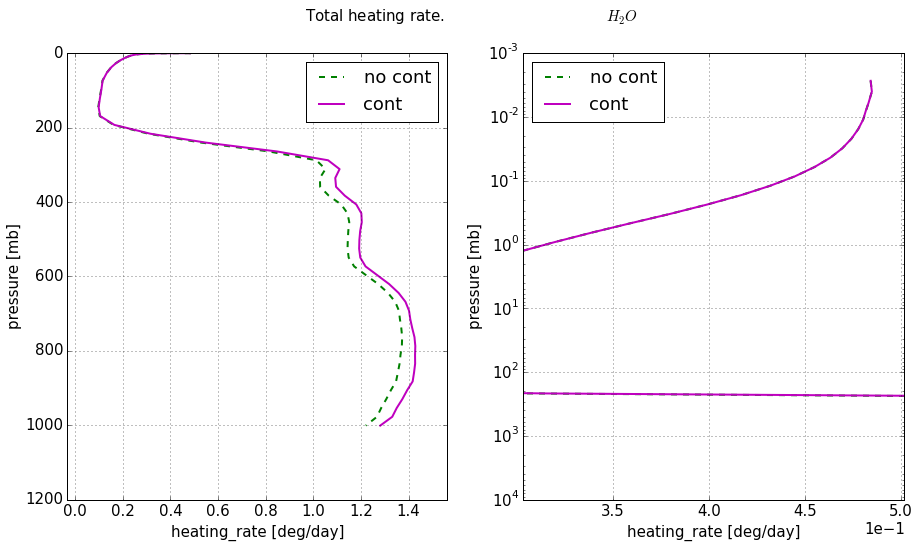

In [12]:
plot_total_heating_rates(
    infos_wavenumber=[('no cont', 'g', '--', pnl_rrtmg_nocont),
                      ('cont', 'm', '-', pnl_rrtmg_cont)])

# In RRMTG's wavenumber bands

In [23]:

def fluxtableNhrplot_by_rrtmg_bands(infos_rrtmg=None, 
                                    infos_lbl=None):
    global name_molecule, xlim_linear
    
    wbands = itertools.chain.from_iterable(
        rrtmginfo.wavenumber_bands(region='sw'))
    
    atm_levels = [70, 30, 0]
    
    if infos_lbl:
        (names_lbl, 
         colours_lbl, 
         linestyles_lbl, 
         pnls_lbl) = map(list, zip(*infos_lbl))
        
        pnls_lbl = [aeranalyse.\
                    lines2bands(pnl_lbl, wbands=wbands)
                    for pnl_lbl in pnls_lbl]
    else:
        (names_lbl, 
         colours_lbl, 
         linestyles_lbl, 
         pnls_lbl) = ([], [], [], [])
        
    if infos_rrtmg:
        (names_rrtmg, 
         colours_rrtmg,
         linestyles_rrtmg,
         pnls_rrtmg) = map(list, zip(*infos_rrtmg))
        
        if infos_lbl:
            [aeranalyse.normalise_by_TOA_flux_down(pnl, 
                                                   normalise_to=pnls_lbl[0])
             for pnl in pnls_rrtmg]
    else:
        (names_rrtmg,
         colours_rrtmg,
         linestyles_rrtmg,
         pnls_rrtmg) = ([], [], [], [])
        
    names = names_rrtmg + names_lbl
    colours = colours_rrtmg + colours_lbl
    linestyles = linestyles_rrtmg + linestyles_lbl
    pnls = pnls_rrtmg + pnls_lbl
        
  
    for item in pnls[0].items:
        print('--------------------------------------------------------------')
        print() 
        dfs = [pnl[item].loc[atm_levels, :] for pnl in pnls]
        
        viz.tabulate_difference(dfs=dfs, 
                                names=names,
                                title=('RRTMG Wavenumber band:\
                                       {} ~ {} cm-1'.format(*item)))     
        
        dfs = [pnl[item] for pnl in pnls]
        
        max_cr = max([df['heating_rate'].max() for df in dfs])
        
        viz.plot_pres_vs_hrcr(dfs=dfs,
                              names=names,
                              linestyles=linestyles, 
                              colours=colours,
                              title=('Heating rate {}\
                                     {} ~ {} cm-1'.format(name_molecule, *item)),
                              cooling_rate=False,
                             xlim_linear=None,
                             xlim_log=None)
    
        display.display(plt.gcf()); plt.close()

Flux tables and heating rates in RRTMG spectral bands


--------------------------------------------------------------


RRTMG Wavenumber band:                                       820.0 ~ 2600.0 cm-1

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0        6.4447     6.4447    6.4447   
30   299.70000       -0             0        4.7174     4.7174    4.7174   
0   1013.00000       -0             0        1.8674     1.8674    1.8674   

    heating_rate  
70       0.00000  
30       0.06512  
0        0.02083  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0        6.4447     6.4447    6.4447   
30   299.70000       -0             0        4.6752     4.6752    4.6752   
0   1013.00000       -0             0        1.4367     1.4367    1.4367   

    heating_rate  
70       0.00000  
30       0.07118  
0        0.03423  

no cont - cont
    p

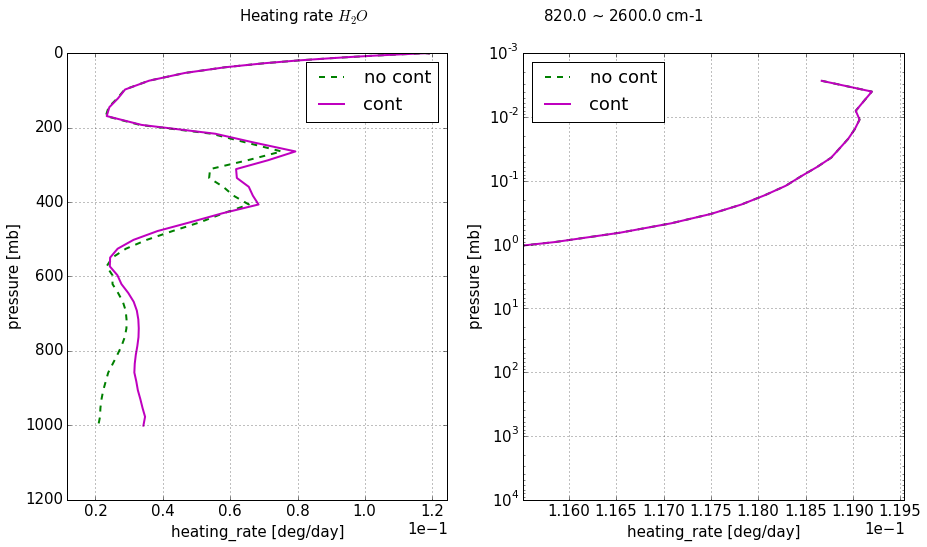

--------------------------------------------------------------


RRTMG Wavenumber band:                                       2600.0 ~ 3250.0 cm-1

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0        6.0548     6.0548    6.0548   
30   299.70000       -0             0        5.9225     5.9225    5.9225   
0   1013.00000       -0             0        2.8829     2.8829    2.8829   

    heating_rate  
70       0.00000  
30       0.01725  
0        0.03686  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0        6.0548     6.0548    6.0548   
30   299.70000       -0             0        5.9211     5.9211    5.9211   
0   1013.00000       -0             0        2.6424     2.6424    2.6424   

    heating_rate  
70       0.00000  
30       0.01747  
0        0.03856  

no cont - cont
    pressure  flux_up  flux_difdown  flux_dirdown  flux_down

/nuwa_cluster/home/jackyu/locally_installed_python_pacakges/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


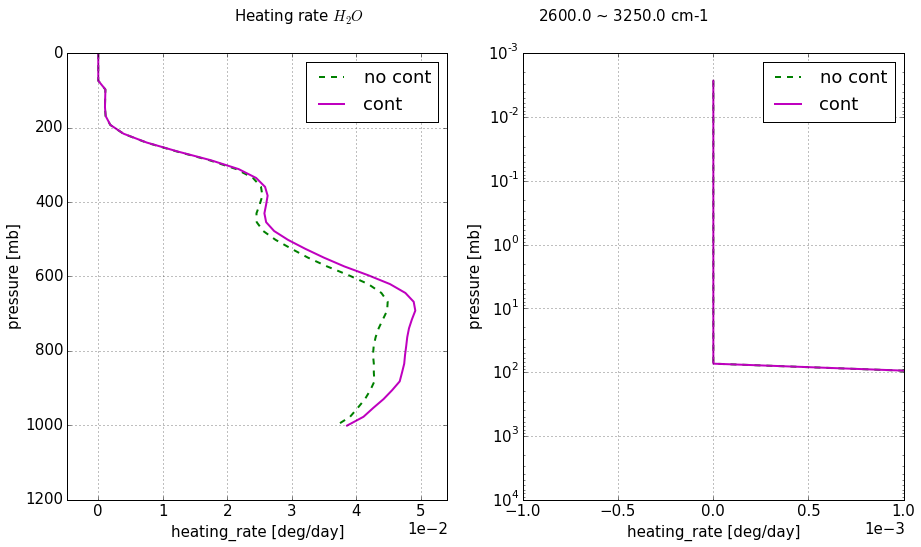

--------------------------------------------------------------


RRTMG Wavenumber band:                                       3250.0 ~ 4000.0 cm-1

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       10.1825    10.1825   10.1825   
30   299.70000       -0             0        7.1431     7.1431    7.1431   
0   1013.00000       -0             0        0.0520     0.0520    0.0520   

    heating_rate  
70       0.00000  
30       0.26814  
0        0.00878  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       10.1825    10.1825   10.1825   
30   299.70000       -0             0        6.9782     6.9782    6.9782   
0   1013.00000       -0             0        0.0184     0.0184    0.0184   

    heating_rate  
70       0.00000  
30       0.28948  
0        0.00437  

no cont - cont
    pressure  flux_up  flux_difdown  flux_dirdown  flux_down

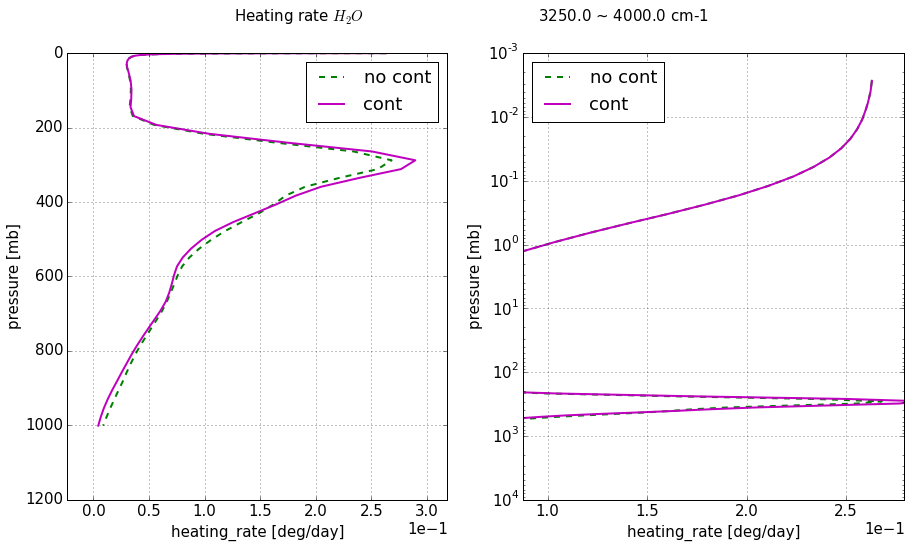

--------------------------------------------------------------


RRTMG Wavenumber band:                                       4000.0 ~ 4650.0 cm-1

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       11.8649    11.8649   11.8649   
30   299.70000       -0             0       11.7935    11.7935   11.7935   
0   1013.00000       -0             0        8.6833     8.6833    8.6833   

    heating_rate  
70       0.00000  
30       0.00925  
0        0.04323  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       11.8649    11.8649   11.8649   
30   299.70000       -0             0       11.7922    11.7922   11.7922   
0   1013.00000       -0             0        8.2723     8.2723    8.2723   

    heating_rate  
70       0.00000  
30       0.00948  
0        0.05248  

no cont - cont
    pressure  flux_up  flux_difdown  flux_dirdown  flux_down

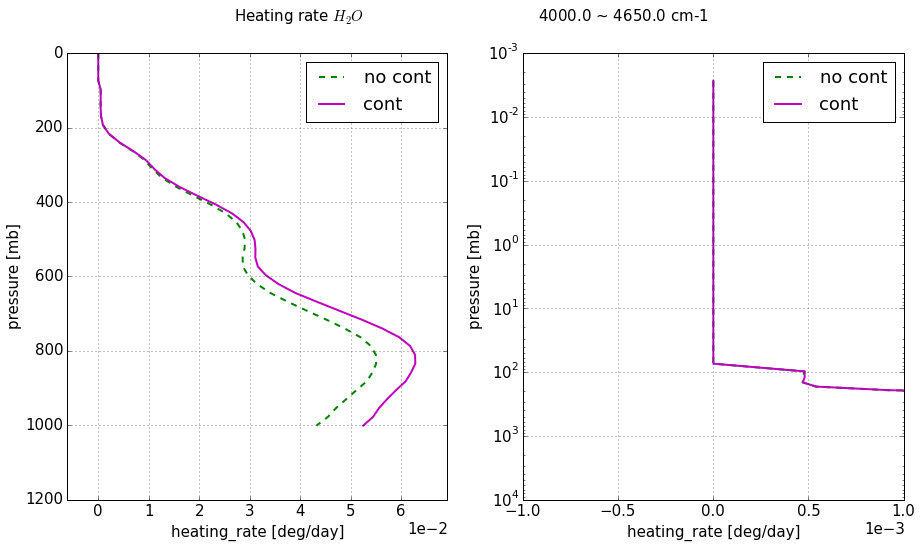

--------------------------------------------------------------


RRTMG Wavenumber band:                                       4650.0 ~ 5150.0 cm-1

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       11.2138    11.2138   11.2138   
30   299.70000       -0             0       11.1614    11.1614   11.1614   
0   1013.00000       -0             0        7.8399     7.8399    7.8399   

    heating_rate  
70       0.00000  
30       0.00813  
0        0.04522  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       11.2138    11.2138   11.2138   
30   299.70000       -0             0       11.1603    11.1603   11.1603   
0   1013.00000       -0             0        7.5776     7.5776    7.5776   

    heating_rate  
70       0.00000  
30       0.00831  
0        0.04960  

no cont - cont
    pressure  flux_up  flux_difdown  flux_dirdown  flux_down

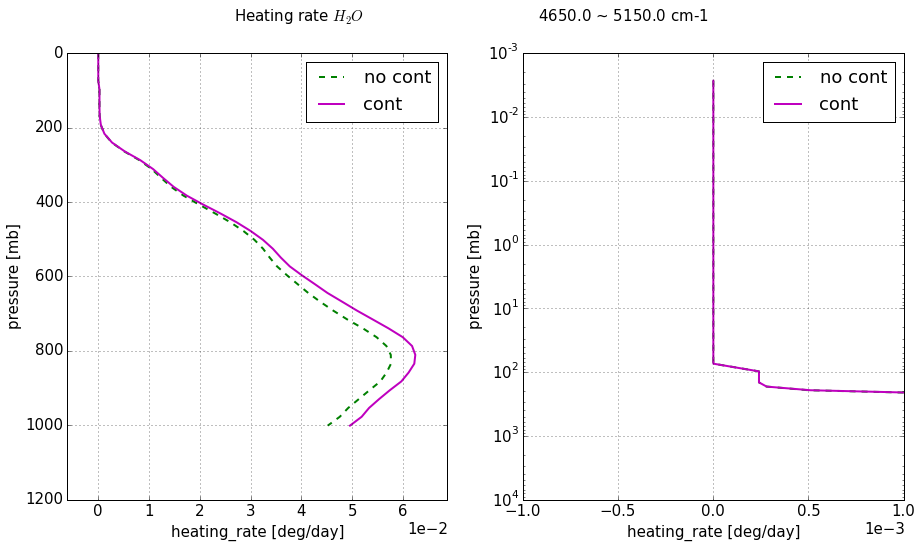

--------------------------------------------------------------


RRTMG Wavenumber band:                                       5150.0 ~ 6150.0 cm-1

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       27.8133    27.8133   27.8133   
30   299.70000       -0             0       25.9028    25.9028   25.9028   
0   1013.00000       -0             0       13.8181    13.8181   13.8181   

    heating_rate  
70       0.00000  
30       0.19698  
0        0.07250  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       27.8133    27.8133   27.8133   
30   299.70000       -0             0       25.8484    25.8484   25.8484   
0   1013.00000       -0             0       13.4528    13.4528   13.4528   

    heating_rate  
70       0.00000  
30       0.20570  
0        0.07377  

no cont - cont
    pressure  flux_up  flux_difdown  flux_dirdown  flux_down

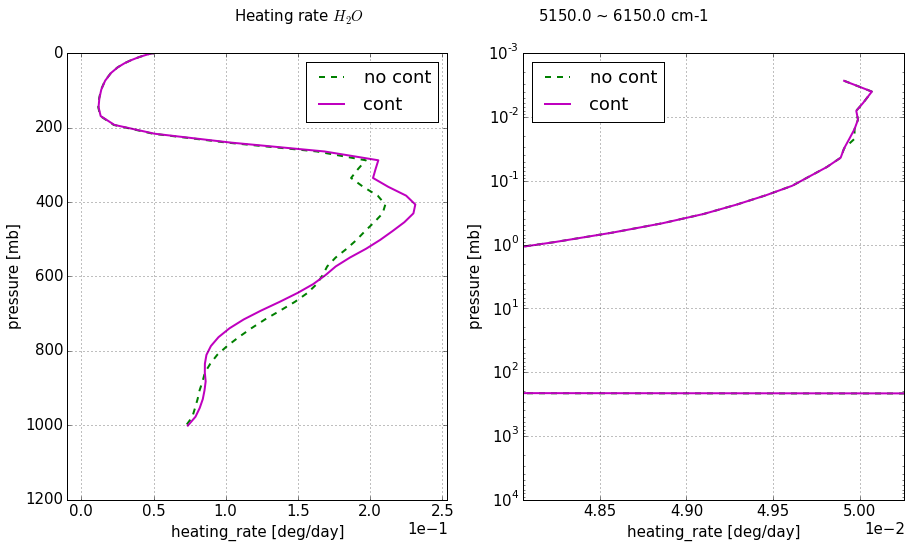

--------------------------------------------------------------


RRTMG Wavenumber band:                                       6150.0 ~ 7700.0 cm-1

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       51.4658    51.4658   51.4658   
30   299.70000       -0             0       48.5907    48.5907   48.5907   
0   1013.00000       -0             0       21.8532    21.8532   21.8532   

    heating_rate  
70       0.00000  
30       0.32089  
0        0.17859  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       51.4658    51.4658   51.4658   
30   299.70000       -0             0       48.5239    48.5239   48.5239   
0   1013.00000       -0             0       20.8191    20.8191   20.8191   

    heating_rate  
70       0.00000  
30       0.33161  
0        0.17943  

no cont - cont
    pressure  flux_up  flux_difdown  flux_dirdown  flux_down

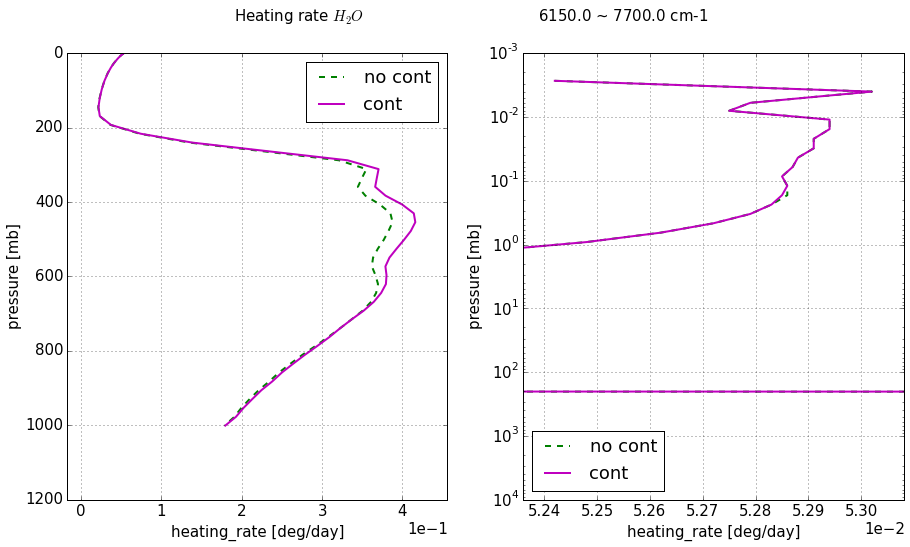

--------------------------------------------------------------


RRTMG Wavenumber band:                                       7700.0 ~ 8050.0 cm-1

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       12.1468    12.1468   12.1468   
30   299.70000       -0             0       12.1462    12.1462   12.1462   
0   1013.00000       -0             0       11.7689    11.7689   11.7689   

    heating_rate  
70       0.00000  
30       0.00011  
0        0.01195  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       12.1468    12.1468   12.1468   
30   299.70000       -0             0       12.1462    12.1462   12.1462   
0   1013.00000       -0             0       11.7356    11.7356   11.7356   

    heating_rate  
70       0.00000  
30       0.00011  
0        0.01347  

no cont - cont
    pressure  flux_up  flux_difdown  flux_dirdown  flux_down

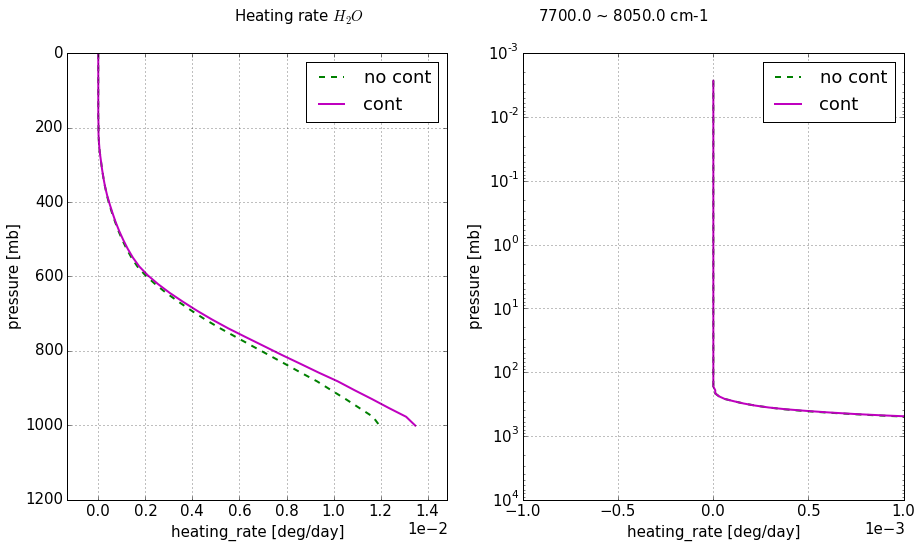

--------------------------------------------------------------


RRTMG Wavenumber band:                                       8050.0 ~ 12850.0 cm-1

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242  -0.0001             0      172.8713   172.8713  172.8712   
30   299.70000  -0.0000             0      171.9919   171.9919  171.9919   
0   1013.00000  -0.0000             0      132.7270   132.7270  132.7270   

    heating_rate  
70       0.00000  
30       0.12220  
0        0.62027  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242  -0.0001             0      172.8713   172.8713  172.8712   
30   299.70000  -0.0000             0      171.9828   171.9828  171.9828   
0   1013.00000  -0.0000             0      130.6629   130.6629  130.6629   

    heating_rate  
70       0.00000  
30       0.12382  
0        0.64473  

no cont - cont
    pressure  flux_up  flux_difdown  flux_dirdown  flux_dow

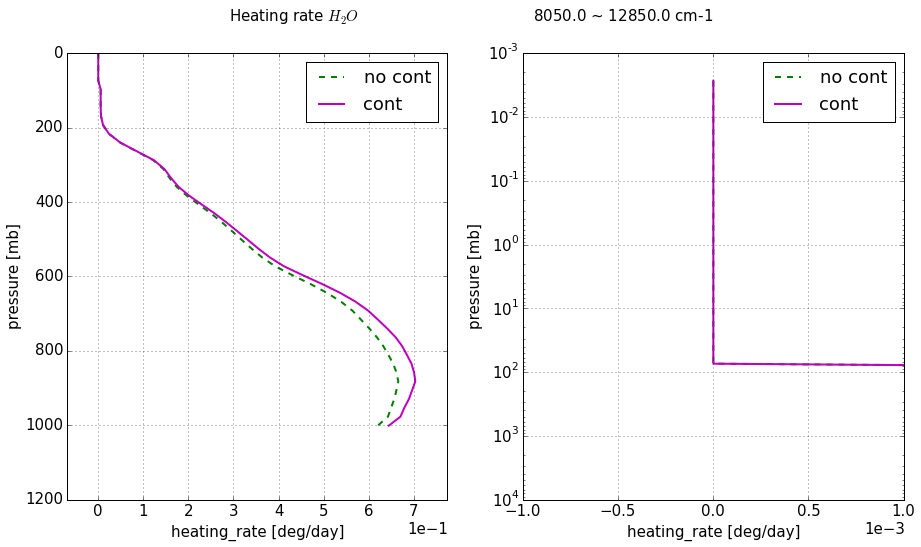

--------------------------------------------------------------


RRTMG Wavenumber band:                                       12850.0 ~ 16000.0 cm-1

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0      109.0936   109.0936  109.0936   
30   299.70000       -0             0      109.0649   109.0649  109.0649   
0   1013.00000       -0             0      103.3554   103.3554  103.3554   

    heating_rate  
70       0.00000  
30       0.00455  
0        0.14624  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0      109.0936   109.0936  109.0936   
30   299.70000       -0             0      109.0647   109.0647  109.0647   
0   1013.00000       -0             0      103.1350   103.1350  103.1350   

    heating_rate  
70       0.00000  
30       0.00460  
0        0.15438  

no cont - cont
    pressure  flux_up  flux_difdown  flux_dirdown  flux_do

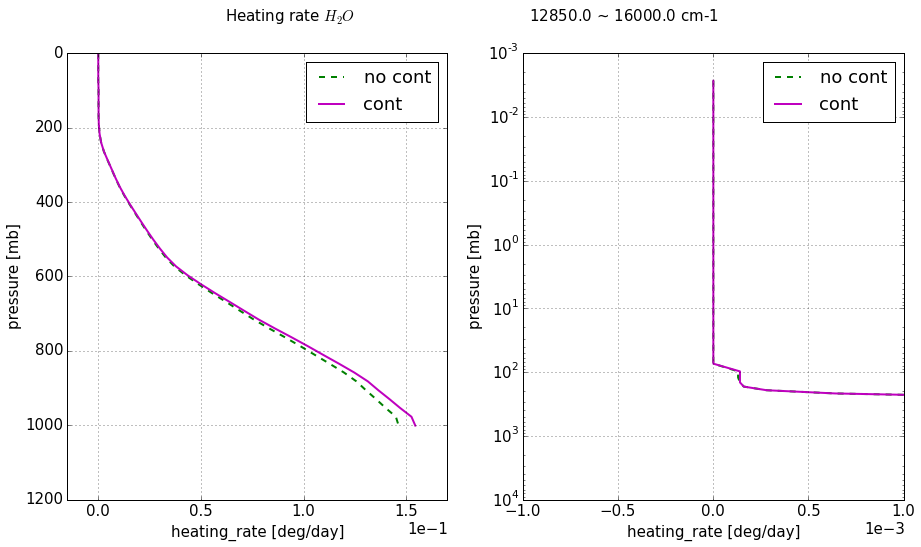

--------------------------------------------------------------


RRTMG Wavenumber band:                                       16000.0 ~ 22650.0 cm-1

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242  -0.0001             0      173.5962   173.5962  173.5961   
30   299.70000  -0.0001             0      173.5930   173.5930  173.5929   
0   1013.00000  -0.0000             0      172.4621   172.4621  172.4621   

    heating_rate  
70       0.00000  
30       0.00050  
0        0.03616  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242  -0.0001             0      173.5962   173.5962  173.5961   
30   299.70000  -0.0001             0      173.5930   173.5930  173.5929   
0   1013.00000  -0.0000             0      172.4621   172.4621  172.4621   

    heating_rate  
70       0.00000  
30       0.00050  
0        0.03616  

no cont - cont
    pressure  flux_up  flux_difdown  flux_dirdown  flux_do

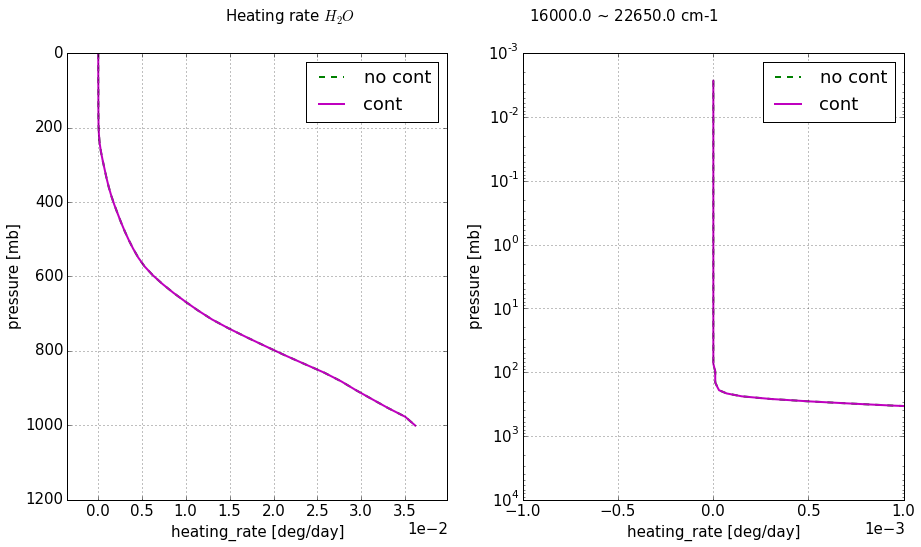

--------------------------------------------------------------


RRTMG Wavenumber band:                                       22650.0 ~ 29000.0 cm-1

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       64.7475    64.7475   64.7475   
30   299.70000       -0             0       64.7475    64.7475   64.7475   
0   1013.00000       -0             0       64.7475    64.7475   64.7475   

    heating_rate  
70             0  
30             0  
0              0  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       64.7475    64.7475   64.7475   
30   299.70000       -0             0       64.7475    64.7475   64.7475   
0   1013.00000       -0             0       64.7475    64.7475   64.7475   

    heating_rate  
70             0  
30             0  
0              0  

no cont - cont
    pressure  flux_up  flux_difdown  flux_dirdown  flux_do

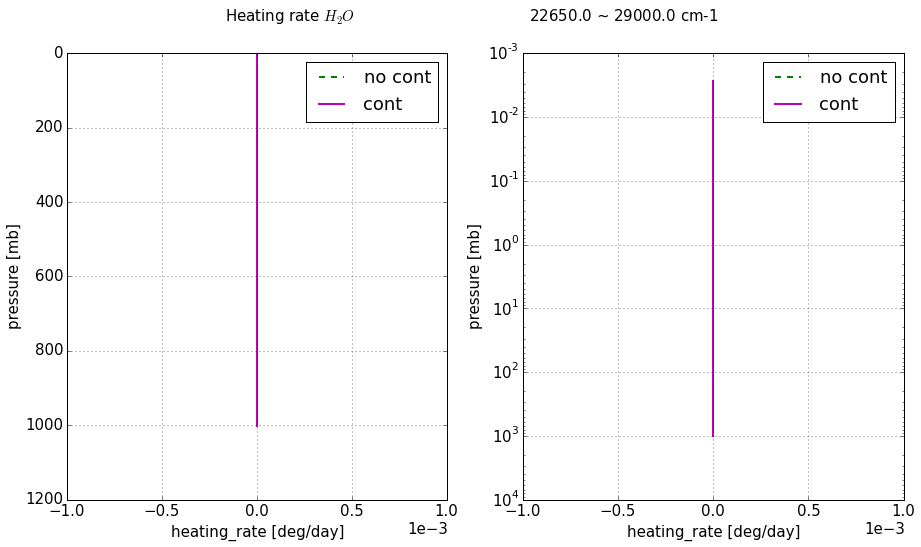

--------------------------------------------------------------


RRTMG Wavenumber band:                                       29000.0 ~ 38000.0 cm-1

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       25.0761    25.0761   25.0761   
30   299.70000       -0             0       25.0761    25.0761   25.0761   
0   1013.00000       -0             0       25.0761    25.0761   25.0761   

    heating_rate  
70             0  
30             0  
0              0  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0       25.0761    25.0761   25.0761   
30   299.70000       -0             0       25.0761    25.0761   25.0761   
0   1013.00000       -0             0       25.0761    25.0761   25.0761   

    heating_rate  
70             0  
30             0  
0              0  

no cont - cont
    pressure  flux_up  flux_difdown  flux_dirdown  flux_do

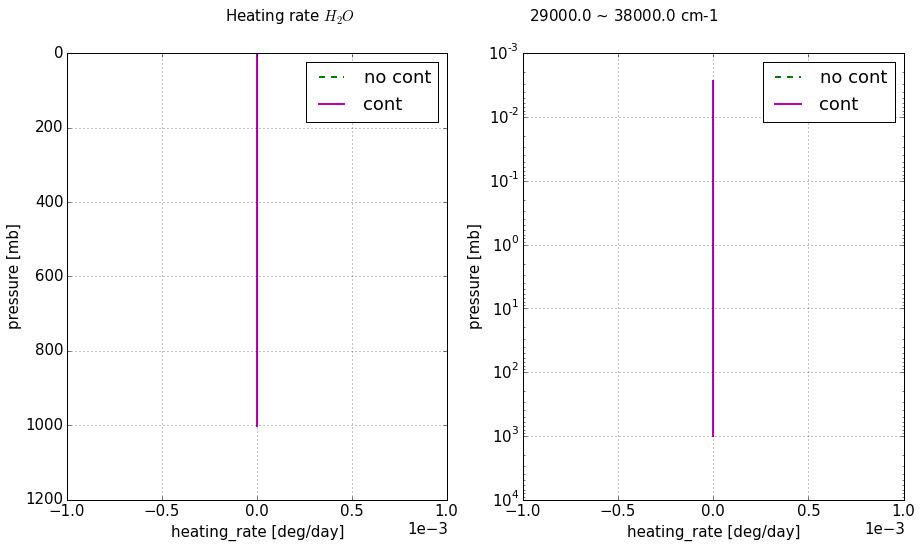

--------------------------------------------------------------


RRTMG Wavenumber band:                                       38000.0 ~ 50000.0 cm-1

no cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0          1.54       1.54      1.54   
30   299.70000       -0             0          1.54       1.54      1.54   
0   1013.00000       -0             0          1.54       1.54      1.54   

    heating_rate  
70             0  
30             0  
0              0  

cont
      pressure  flux_up  flux_difdown  flux_dirdown  flux_down  net_flux  \
70     0.00242       -0             0          1.54       1.54      1.54   
30   299.70000       -0             0          1.54       1.54      1.54   
0   1013.00000       -0             0          1.54       1.54      1.54   

    heating_rate  
70             0  
30             0  
0              0  

no cont - cont
    pressure  flux_up  flux_difdown  flux_dirdown  flux_do

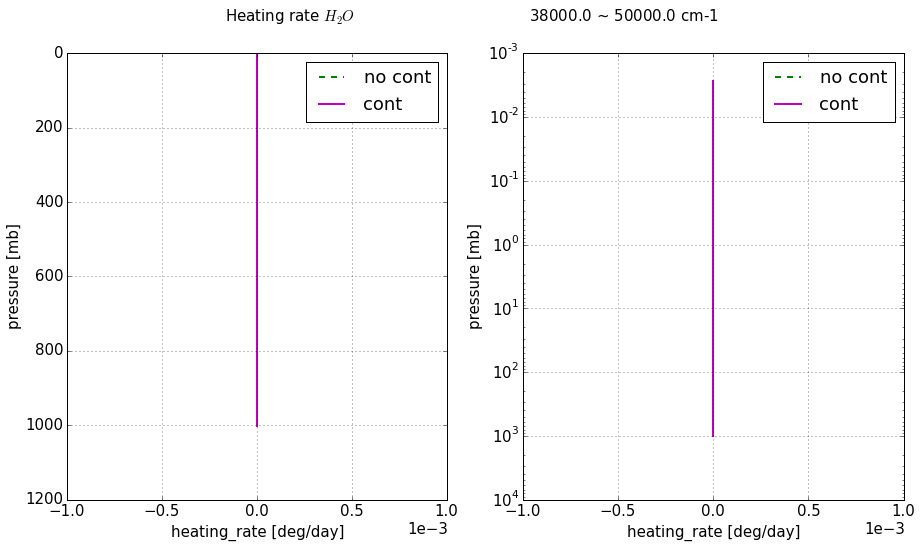

In [24]:
print('Flux tables and heating rates in RRTMG spectral bands')
print()
print()

infos_rrtmg = [('no cont', 'g', '--', pnl_rrtmg_nocont),
               ('cont', 'm', '-', pnl_rrtmg_cont)]
fluxtableNhrplot_by_rrtmg_bands(infos_rrtmg=infos_rrtmg)

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')